- Has the network latency gone up since we switched internet service providers?

Is there a relationship between switching providers and the network latency going up?

NULL: Latency has remained the same or decreased
ALT: Latency has increased 

Type 1: We belived the current provider was worse than before, but we were wrong
Type 2: The current provider is worse than the one before, but we thought there wsa no relationship

- Is the website redesign any good?

Do we get more user interaction after the website redesign?

NULL: The redesign had no effect 
ALT: Because the redesign was more user friendly, we got more user interaction

Type 1: The webisite redesign had an affect but we said there wasn't
Type 2: There was no affect but we said that there was 

- Is our television ad driving more sales?

Did our tv had have an effect in the number of sales going up?

NULL: The tv ad had no effect on our sales
ALT: The tv ad positively affected our number of sales since going public

# Exercise 1

## Answer with the type of test you would use (assume normal distribution):

### Is there a difference in grades of students on the second floor compared to grades of all students?

- I would use a T-test 2 sample, 2 tail

### Are adults who drink milk taller than adults who dont drink milk?

- I would use a Two-Sample T-test, 1 tail

### Is the the price of gas higher in texas or in new mexico?

- I would use a Independent T-test, 1 tail

### Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy? 

- I would use an ANOVA test

# Exercise 3

## Load the mpg dataset and use it to answer the following questions:

### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
from pydataset import data
df = data('mpg')
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [3]:
df['fuel_effiecincy'] = (df.hwy + df.cty) / 2

In [4]:
cars_1999 = df['fuel_effiecincy'][df.year == 1999]
cars_1999

1      23.5
2      25.0
5      21.0
6      22.0
8      22.0
9      20.5
12     20.0
13     21.0
16     19.5
22     15.0
24     21.0
25     19.0
31     13.0
32     15.5
33     23.0
35     22.0
38     21.0
39     20.5
40     19.0
41     19.0
45     18.5
46     18.0
51     15.0
52     15.5
56     14.0
57     13.0
58     15.0
62     13.5
64     13.0
71     13.0
72     13.5
74     13.0
75     14.0
76     14.0
78     15.5
79     17.0
80     15.5
83     15.0
84     15.5
85     15.5
86     14.5
87     14.5
89     13.0
91     22.0
92     21.5
95     18.0
96     18.5
100    30.5
101    28.0
102    28.5
103    26.0
104    28.0
109    22.0
110    22.5
113    22.0
114    22.0
116    22.5
117    24.0
125    17.5
126    15.5
131    13.0
134    13.0
135    14.0
136    13.5
138    15.5
141    15.0
142    25.0
143    23.0
148    22.0
149    22.0
151    15.5
152    16.0
155    22.0
156    21.0
157    22.0
160    21.5
161    21.0
166    23.5
167    22.5
168    22.5
169    22.5
174    17.5
175    18.0
176 

In [5]:
cars_2008 = df['fuel_effiecincy'][df.year == 2008]
cars_2008

3      25.5
4      25.5
7      22.5
10     24.0
11     23.0
14     21.0
15     20.0
17     21.0
18     19.5
19     17.0
20     13.0
21     17.0
23     14.5
26     21.0
27     20.0
28     19.5
29     16.5
30     12.5
34     26.0
36     23.5
37     21.5
42     20.5
43     20.5
44     14.0
47     19.5
48     19.5
49     17.0
50     16.0
53     16.5
54     16.5
55     10.5
59     15.0
60     10.5
61     15.0
63     15.5
65     14.0
66     10.5
67     15.0
68     15.0
69     14.0
70     10.5
73     15.0
77     15.0
81     16.0
82     16.0
88     15.0
90     15.0
93     21.5
94     20.0
97     19.0
98     18.5
99     17.0
105    30.0
106    30.5
107    30.0
108    25.0
111    25.5
112    26.0
115    23.5
118    24.0
119    23.5
120    20.5
121    20.0
122    20.5
123    19.5
124    17.0
127    10.5
128    16.5
129    15.5
130    12.5
132    15.0
133    15.0
137    15.0
139    16.0
140    16.0
144    27.0
145    27.5
146    23.0
147    22.5
150    22.0
153    17.0
154    15.0
158    23.0
159 

In [6]:
print(cars_2008.var())
print(cars_1999.var())



24.097480106100797
27.122605363984682


In [7]:
t, p = stats.ttest_ind(cars_2008, cars_1999, equal_var=False)
t, p


(-0.21960177245940962, 0.8263750772060638)

In [9]:
alpha= 0.05

In [10]:
print("Reject $H_{0}$? ", p < alpha)



Reject $H_{0}$?  False


### Are compact cars more fuel-efficient than the average car?

In [ ]:
compact = df['fuel_effiecincy'][df['class'] == 'compact']
compact

In [ ]:
all_cars = df['fuel_effiecincy'].mean()
all_cars

In [ ]:
print(compact.var())
print(all_cars.var())

In [ ]:
t, p = stats.ttest_1samp(compact, all_cars)
t, p / 2

In [ ]:
print("is p/2 < alpha? ", p / 2 < alpha)
print("is t > 0? ", t > 0)


In [ ]:
if p / 2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")


### Do manual cars get better gas mileage than automatic cars?

In [ ]:
df['fuel_effiecincy'][df['trans'].str.contains['manual']
df

In [ ]:
df


In [ ]:
df_manual = df[df['trans'].str.contains('manual')]

In [ ]:
df_auto = df[df['trans'].str.contains('auto')]
df_auto

In [ ]:
manual = df_manual['fuel_effiecincy']

In [ ]:
auto = df_auto['fuel_effiecincy']

In [ ]:
print(manual.var())
print(auto.var())


In [ ]:
t, p = stats.ttest_ind(manual, auto, equal_var=False)
t, p / 2


In [ ]:
print("is p/2 < alpha? ", p / 2 < alpha)
print("is t > 0? ", t > 0)


In [ ]:
if p / 2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")


# Exercise 2 
- Bonus

### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

-------

# Answer with the type of stats test you would use (assume normal distribution):

### Is there a relationship between the length of your arm and the length of your foot?

Pearson's R/ Spearman's R

### Do guys and gals quit their jobs at the same rate?

Independent t-test(two tailed)

### Does the length of time of the lecture correlate with a students grade?

Pearson's R or Spearman

# Use the telco_churn data

### Does tenure correlate with monthly charges?

In [63]:
import env
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from scipy import stats
from pydataset import data

def get_db_url(username, password, hostname, db):
    return f'mysql+pymysql://{username}:{password}@{hostname}/{db}'
url = get_db_url(env.username, env.password, env.hostname, db = 'telco_churn')

In [64]:
query = 'SELECT * FROM customers'
df = pd.read_sql(query, url)

In [65]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


In [ ]:
H_0: ther is no linear relationship
H_a: there is a linear relationship

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  7043 non-null   float64
 1   tenure           7043 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 110.2 KB


<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

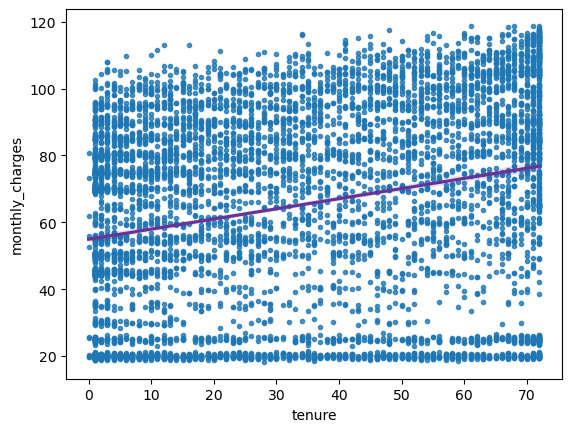

In [66]:
charges_df = df[['monthly_charges', 'tenure']]

charges_df.info()
sns.regplot(x = 'tenure', y = 'monthly_charges', data= charges_df, marker= '.', line_kws= {'color': 'rebeccapurple'})

<AxesSubplot:>

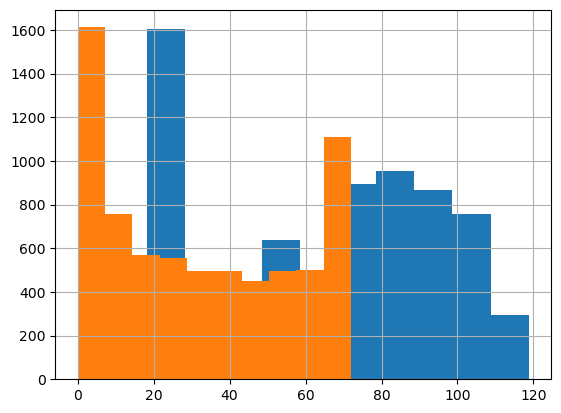

In [68]:
# distributions of the data to check for normaility 

charges_df.monthly_charges.hist()
charges_df.tenure.hist()

** Takeaways**

These ditributions are not normal, so we will use a Spearman's test

In [69]:
alpha = 0.05
r, p = stats.spearmanr(charges_df.tenure, charges_df.monthly_charges)

def eval_result(alpha, p):
    if p < alpha:
        return print(f'Reject the null hypothesis. There is a linear correlation (p-value: {p})')
    else:
        return print(f'We fail to reject the null hypothesis that there is a linear correlation (p-value: {p})')

In [70]:
eval_result(alpha, p)

r

Reject the null hypothesis. There is a linear correlation (p-value: 1.0271266876409408e-123)


0.27641678933130215

There is a correlation between monthly charges and tenure. With an r of .28, we can say the correlation is "weak-moderate"
The r-value was .28, this allows us to say that there is a correlation between monthly charges and tenure, and that the correlation is 'weak-moderate

### Total charges?

In [29]:
alpha = 0.05
# select data

# look at a summary of the dataframe
ttl_charges_df = df[['tenure', 'total_charges']]
ttl_charges_df.info()

# try to find data errors
ttl_chages_df.total_charges.sort_values()

# convert the empty space to '0'
ttl_charges_df['total_charges'] = ttl_charges_df['total_charges'].str.replace(' ', '0').astype('float')

# confirm our data types
ttl_charges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tenure         7043 non-null   int64 
 1   total_charges  7043 non-null   object
dtypes: int64(1), object(1)
memory usage: 110.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tenure         7043 non-null   int64  
 1   total_charges  7043 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 110.2 KB


/var/folders/xf/3yzy_crd6fg3jwj3r580c2dm0000gn/T/ipykernel_53679/1091317011.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttl_charges_df['total_charges'] = ttl_charges_df['total_charges'].str.replace(' ', '0').astype('float')


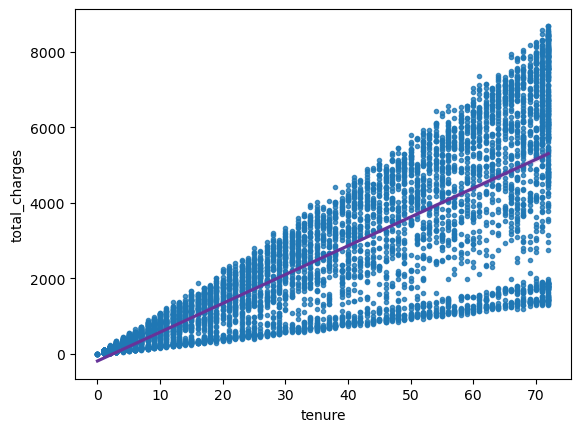

In [72]:
# plot the data
sns.regplot(x = 'tenure', y='total_charges', 
            data = ttl_charges_df, marker='.', line_kws={'color': 'rebeccapurple'})
plt.show()

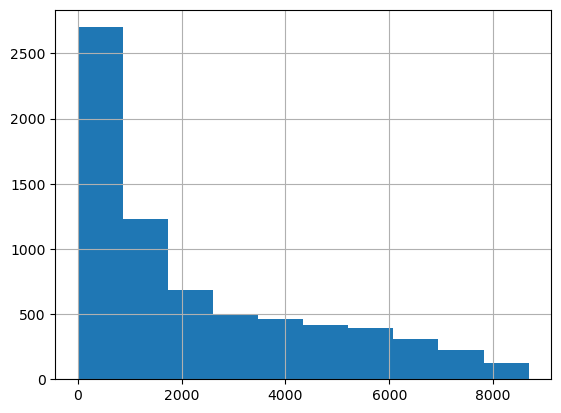

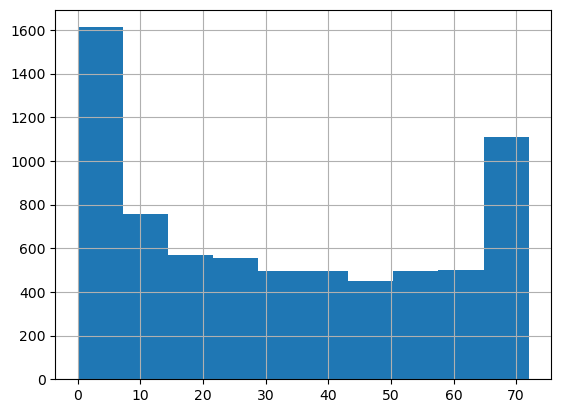

In [73]:
# check assumptions
ttl_charges_df.total_charges.hist()
plt.show()
ttl_charges_df.tenure.hist()
plt.show()

We will use spearman's test since they are not normally distributed

In [74]:
# run our test

r, p = stats.spearmanr(ttl_charges_df.tenure, ttl_charges_df.total_charges)

eval_result(alpha, p)
    


Reject the null hypothesis. There is a linear correlation (p-value: 0.0)


The takeaway:

With the r-vaule being .89, this allows us to say that the linear correlation is strong

### What happens if you control for phone and internet service?

1. state our hypothesis, set our alpha value.
2. select the data, run a .info()
3. plot the data
4. test for assumptions (normal distribution for correlation)
5. run test
6. draw conclusions


Of customers who have only phone service:

H_0: there is no linear correlation between tenure and monthly charges. 

H_a: there is a linear correlation between tenure and monthly charges.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1739 entries, 0 to 7041
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           1739 non-null   int64  
 1   monthly_charges  1739 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 40.8 KB


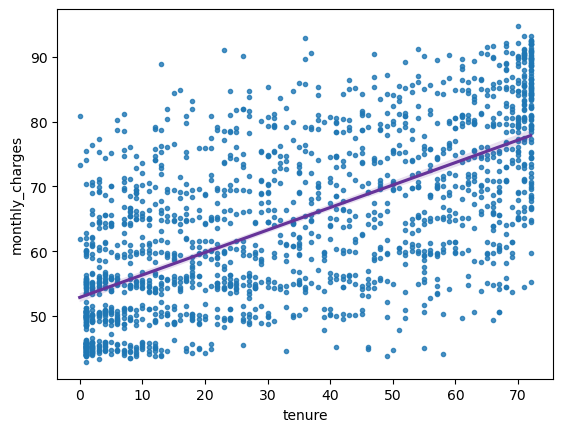

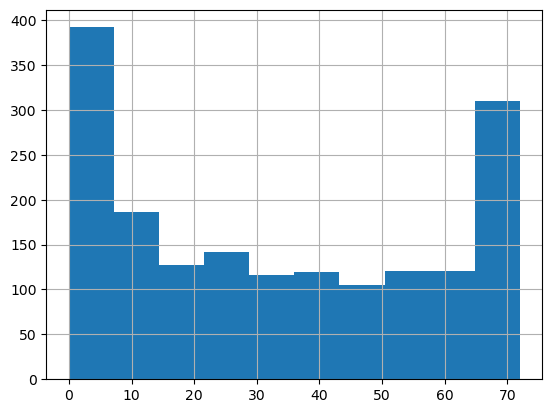

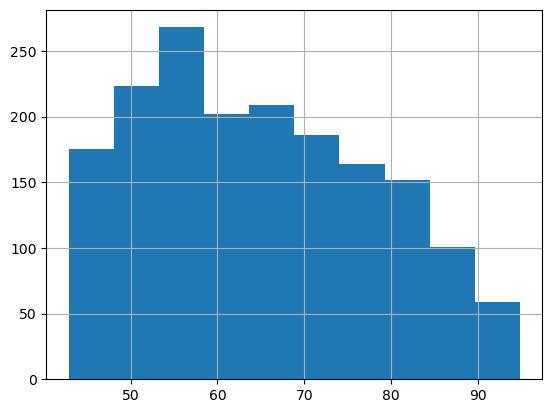

In [75]:
# set alpha
alpha = 0.05

# select the data
phone_df = df[(df.phone_service == 'Yes') & (df.internet_service_type_id == 1)][['tenure', 'monthly_charges']]

# look at info
phone_df.info()

# plot the data
sns.regplot(x='tenure', y='monthly_charges', data=phone_df, marker='.', 
            line_kws=({'color': 'rebeccapurple'}))
plt.show()

# check for normal distribution

phone_df.tenure.hist()
plt.show()

phone_df.monthly_charges.hist()
plt.show()

In [76]:
r, p = stats.spearmanr(phone_df.tenure, phone_df.monthly_charges)

eval_result(alpha, p)

print(f'r value = {r}')

Reject the null hypothesis. There is a linear correlation (p-value: 5.423601644635052e-222)
r value = 0.6644708508462759


The takeaway:

There is a moderate-strong correlation betwen tenure and monthly charges for customers who have only phone service.

# Use the employees database

### Is there a relationship between how long an employee has been with the company and their salary?

In [56]:
url = get_db_url(env.username, env.password, env.hostname, db='employees')

# this query joins the employees and salaries table together using the emp_no(employee number)
# and uses the date '9999-01-01' to return the current employees

query = '''
SELECT * 
FROM employees
JOIN salaries USING (emp_no)
WHERE to_date = '9999-01-01';
'''

df = pd.read_sql(query, url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      240124 non-null  int64 
 1   birth_date  240124 non-null  object
 2   first_name  240124 non-null  object
 3   last_name   240124 non-null  object
 4   gender      240124 non-null  object
 5   hire_date   240124 non-null  object
 6   salary      240124 non-null  int64 
 7   from_date   240124 non-null  object
 8   to_date     240124 non-null  object
dtypes: int64(2), object(7)
memory usage: 16.5+ MB


1. state our hypothesis, set our alpha value.
2. select the data, run a .info()
3. plot the data
4. test for assumptions (normal distribution for correlation)
5. run test
6. draw conclusions


H_0: there is no linear correlation between employee tenure and salary.

H_a: there is a linear correlation between employee tenure and salary.

<AxesSubplot:xlabel='tenure', ylabel='salary'>

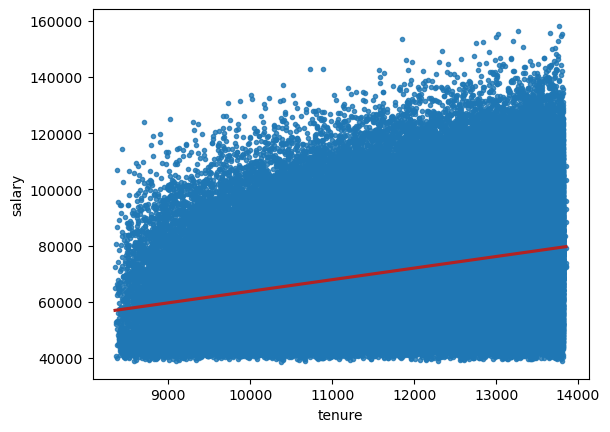

In [57]:
alpha = 0.05

# select our data, calculate tenure

# using today's date minus the hire date to find the tenure
df['tenure'] = pd.to_datetime("today") - pd.to_datetime(df.hire_date)

# turning the date value into a string, splitting it and then using the index to turn the value we need
# into an 'int'
df['tenure'] = df.tenure.astype('str').str.split(' ', expand=True)[0].astype('int')

# df.info()
tenure_df = df[['tenure', 'salary']]

# plot the data
sns.regplot(x='tenure', y='salary', 
            data=tenure_df, marker='.', 
            line_kws=({'color': 'firebrick'}))

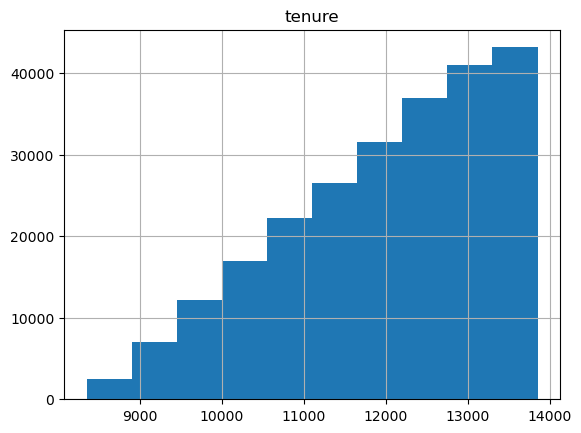

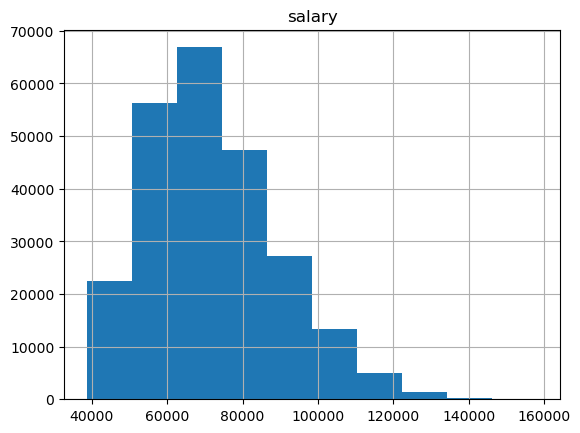

In [58]:
# look at the distribution, look for normality

tenure_df.tenure.hist()
plt.title('tenure')
plt.show()
tenure_df.salary.hist()
plt.title('salary')
plt.show()

In [59]:
# run the test
r, p = stats.spearmanr(tenure_df.tenure, tenure_df.salary)

# evaluate results
eval_result(alpha, p)

print('r value: ', r)


reject the null hypothesis    , there is a linear correlatin between monthly charges and tenure     (p-value: 0.0)
r value:  0.3128783525010577


Tenure and salary have a moderate relationship

### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

1. State our hypothesis, set our alpha value.
2. Select the data, run a .info()
3. Plot the data
4. Test for assumptions (normal distribution for correlation)
5. Run test
6. Draw conclusions

- H_0: No linear correlation between tenure and number of titles.
- H_a: There is a linear correalation between tenure and number of titles

In [42]:
alpha = 0.05

# select the data
url = get_db_url(env.username, env.password, env.hostname, db='employees')

# this query and subquery is used to get the employee number, the number of titles each employee
# has had and the number of days they have worked at the company. 

query = '''
select t.emp_no, count(t.title) as num_titles, te.tenure
from titles t
join (select emp_no, datediff(now(), min(from_date)) AS tenure
from titles
group by emp_no
having max(to_date) = '9999-01-01'
) te using (emp_no)
group by t.emp_no;
'''

df = pd.read_sql(query, url)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   emp_no      240124 non-null  int64
 1   num_titles  240124 non-null  int64
 2   tenure      240124 non-null  int64
dtypes: int64(3)
memory usage: 5.5 MB


<AxesSubplot:xlabel='tenure', ylabel='num_titles'>

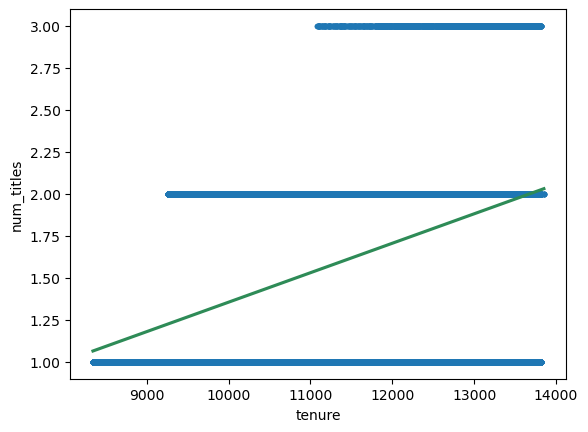

In [43]:
# this assgins the old dataframe to a new one to it contains the number of titles held and the number
# of days worked
df = df[['num_titles', 'tenure']]

# plot the data, Maggie used the color seagreen, but it should have been firebrick because 
# it looks better
sns.regplot(x='tenure', y='num_titles', data=df, marker='.', line_kws=({'color': 'seagreen'}))


# Use the sleepstudy data

In [37]:
from pydataset import data
df = data('sleepstudy')
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


<AxesSubplot:xlabel='Days', ylabel='Reaction'>

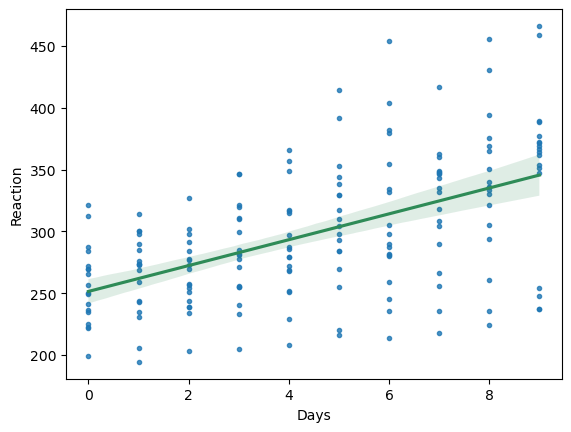

In [38]:
alpha = 0.05

# select the data from the dataframe; 'Reaction', and 'Days'
df = df[['Reaction', 'Days']]

# plot the data to get more insight
sns.regplot(x='Days', y='Reaction', data=df, marker='.', line_kws=({'color':'seagreen'}))


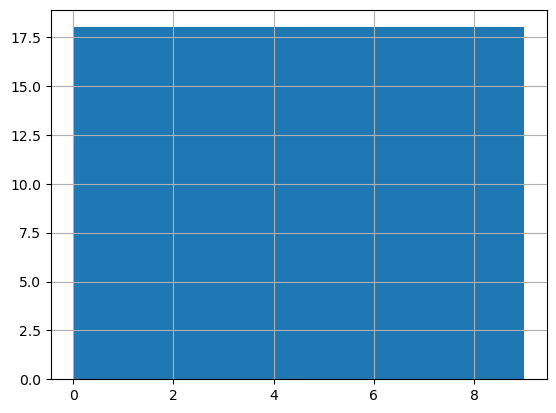

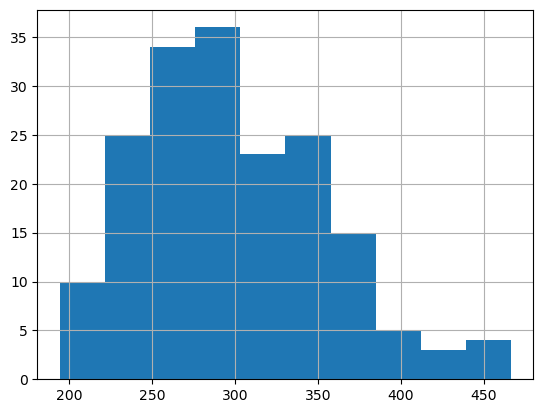

In [39]:

# check for normalilty
# plot the needed data sepreatly 
df.Days.hist()
plt.show()

df.Reaction.hist()
plt.show()

In [40]:
# run the spearman test
r, p = stats.spearmanr(df.Days, df.Reaction)
eval_result(alpha, p)
print('r value: ', r)

reject the null hypothesis    , there is a linear correlatin between monthly charges and tenure     (p-value: 5.132878057706873e-14)
r value:  0.5228138502259547


TAKEAWAY:
    This shows a moderate correlation between 'Reaction', and 'Days'

<hr style="border:2px solid gray">

## Exercises

Continue working in your `hypothesis_testing` notebook.

### 1. Answer with the type of stats test you would use (assume normal distribution): 

- Do students get better test grades if they have a rubber duck on their desk?

two sample one tail

- Does smoking affect when or not someone has lung cancer? 

chi squared

- Is gender independent of a person’s blood type?

chi squared 

- A farming company wants to know if a new fertilizer has improved crop yield or not

independent t test / chi squared

- Does the length of time of the lecture correlate with a students grade? 

Correlation Test (Pearson's R)

- Do people with dogs live in apartments more than people with cats? 

Chi squared

  ### 2. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other. 
   |               &nbsp;     | Codeup Student | Not Codeup Student |
    | --------------------- | -------------- | ------------------ |
    | Uses a Macbook        | 49             | 20                 |
    | Doesn't Use A Macbook | 1              | 30                 |


In [94]:
# this makes the dataframe above
#df= pd.DataFrame({'Codeup Student': [49, 1], 'Not Codeup Student': [20, 30]})
#df 

,Codeup Student,Not Codeup Student
0,49,20
1,1,30


In [100]:
# this renames the Index 
#df.index = ['Mac User', 'Not Mac user']
#df

,Codeup Student,Not Codeup Student
Mac User,49,20
Not Mac user,1,30


In [ ]:
H_0: using a macbook being a codeup student are independent of each other
H_a: using a macbook being a codeup student are NOT independent of each other

In [96]:
chi2, p, degf, expected = stats.chi2_contingency(df)
chi2, p

(36.65264142122487, 1.4116760526193828e-09)

In [98]:
alpha = .05

if p < alpha:
    print('Reject the Null Hypo')
else:
    print('Fail to reject the Null Hypo')

Reject the Null Hypo


In [99]:
expected

array([[34.5, 34.5],
       [15.5, 15.5]])

### 3. Choose another 2 categorical variables from the `mpg` dataset and perform a $chi^2$ contingency table test with them. Be sure to state your null and alternative hypotheses.

In [49]:
mpg = data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


H_0: there is no relationship between manufacturer and cyl

H_a: there is relationship between manufacturer and cyl

In [50]:
observed = pd.crosstab(mpg.manufacturer, mpg.cyl)
observed

cyl,4,5,6,8
manufacturer,,,,
audi,8,0,9,1
chevrolet,2,0,3,14
dodge,1,0,15,21
ford,0,0,10,15
honda,9,0,0,0
hyundai,8,0,6,0
jeep,0,0,3,5
land rover,0,0,0,4
lincoln,0,0,0,3


In [51]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [52]:
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(observed.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values\n')

# print the expected values array
print(expected.astype(int))

# print a new line
print('---\n')

# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2:.4f}') 

# print the p-value, formatted to a float with 4 digits. 
print(f'p = {p:.4f}')
print('Is p-value < alpha?', p < alpha)

Observed Values

[[ 8  0  9  1]
 [ 2  0  3 14]
 [ 1  0 15 21]
 [ 0  0 10 15]
 [ 9  0  0  0]
 [ 8  0  6  0]
 [ 0  0  3  5]
 [ 0  0  0  4]
 [ 0  0  0  3]
 [ 0  0  2  2]
 [ 4  0  8  1]
 [ 0  0  4  1]
 [14  0  0  0]
 [18  0 13  3]
 [17  4  6  0]]
---
Expected Values

[[ 6  0  6  5]
 [ 6  0  6  5]
 [12  0 12 11]
 [ 8  0  8  7]
 [ 3  0  3  2]
 [ 4  0  4  4]
 [ 2  0  2  2]
 [ 1  0  1  1]
 [ 1  0  1  0]
 [ 1  0  1  1]
 [ 4  0  4  3]
 [ 1  0  1  1]
 [ 4  0  4  4]
 [11  0 11 10]
 [ 9  0  9  8]]
---

chi^2 = 198.1175
p = 0.0000
Is p-value < alpha? True


### 4. Use the data from the employees database to answer these questions:

 

- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [81]:
url = get_db_url(env.username, env.password, env.hostname, db='employees')

In [109]:
query = '''
SELECT gender, dept_name, demp.dept_no FROM employees
JOIN dept_emp as demp USING(emp_no) 
JOIN departments as dno USING(dept_no)
WHERE demp.to_date >= NOW()
AND dept_name = 'Sales'
OR dept_name = 'Marketing'
GROUP BY dept_name, emp_no;

'''

In [110]:
df = pd.read_sql(query, url)
df

,gender,dept_name,dept_no
0,F,Marketing,d001
1,M,Marketing,d001
2,M,Marketing,d001
3,M,Marketing,d001
4,F,Marketing,d001
...,...,...,...
57907,F,Sales,d007
57908,M,Sales,d007
57909,M,Sales,d007
57910,F,Sales,d007


In [112]:
observed = pd.crosstab(df['gender'], df['dept_name'])

In [113]:
chi2, p, degf, expected = stats.chi2_contingency(observed)


- Is an employee's gender independent of whether or not they are or have been a manager?

In [130]:
query = '''
SELECT gender, dept_no
FROM employees
LEFT JOIN dept_manager USING(emp_no);
'''

In [131]:
df = pd.read_sql(query, url)
#df
df = df[['gender', 'dept_no']]

In [132]:
df['dept_no'].value_counts()

d004    4
d006    4
d009    4
d001    2
d002    2
d003    2
d005    2
d007    2
d008    2
Name: dept_no, dtype: int64

In [127]:
np.where(df['dept_no'].isina(), 'No', 'Yes')

AttributeError: 'Series' object has no attribute 'isina'

In [129]:
df['is_manager'] = np.where(df['dept_no'].isina(), 'No', 'Yes')

AttributeError: 'Series' object has no attribute 'isina'

In [114]:
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(observed.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values\n')

# print the expected values array
print(expected.astype(int))

# print a new line
print('---\n')

# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2:.4f}') 

# print the p-value, formatted to a float with 4 digits. 
print(f'p = {p:.4f}')
print('Is p-value < alpha?', p < alpha)

Observed Values

[[ 8037 14999]
 [12174 22702]]
---
Expected Values

[[ 8039 14996]
 [12171 22704]]
---

chi^2 = 0.0012
p = 0.9723
Is p-value < alpha? False


In [90]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [91]:
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(observed.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values\n')

# print the expected values array
print(expected.astype(int))

# print a new line
print('---\n')

# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2:.4f}') 

# print the p-value, formatted to a float with 4 digits. 
print(f'p = {p:.4f}')
print('Is p-value < alpha?', p < alpha)

Observed Values

[[0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0]
 [1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1]]
---
Expected Values

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
---

chi^2 = 24.0000
p = 0.4038
Is p-value < alpha? False
